### step 1: Import libraries and the dataset

In [1]:
!pip install imblearn

In [2]:
!pip install xgboost --quiet

In [7]:
!pip install streamlit

     ---------------------------------------  7.5/7.5 MB 297.0 kB/s eta 0:00:01


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\Admin\.conda\envs\mlops\lib\site-packages\pip\_vendor\urllib3\response.py", line 435, in _error_catcher
    yield
  File "C:\Users\Admin\.conda\envs\mlops\lib\site-packages\pip\_vendor\urllib3\response.py", line 516, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "C:\Users\Admin\.conda\envs\mlops\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
  File "C:\Users\Admin\.conda\envs\mlops\lib\http\client.py", line 459, in read
    n = self.readinto(b)
  File "C:\Users\Admin\.conda\envs\mlops\lib\http\client.py", line 503, in readinto
    n = self.fp.readinto(b)
  File "C:\Users\Admin\.conda\envs\mlops\lib\socket.py", line 669, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\Admin\.conda\envs\mlops\lib\ssl.py", line 1241, in recv_into
    return self.read(nbytes, buffer)
  File "C:\Users\Admin\.conda\envs\mlops\lib\ssl.py", 

In [4]:
!pip install shap

     -------------------------------------- 462.3/462.3 kB 1.9 MB/s eta 0:00:00


In [6]:
# data manipulation and EDA libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# data preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from imblearn.over_sampling import SMOTE

# data modelling libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# data metrics libraries
from sklearn.metrics import accuracy_score,recall_score,precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

# model intrepretation and deploytment libraries
import shap
import pickle
from sklearn.pipeline import Pipeline
import streamlit as st

print('All libraries imported')

ModuleNotFoundError: No module named 'streamlit'

In [8]:
data = pd.read_csv('diabetes.csv')
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age          Outcome  
0                     0.627   50              Yes  
1                     0.351   31               No  
2                     0.672   32              Yes  
3                     0.167   21               No  
4                     2.288   33  Tested_Positive

In [9]:
# get the basic info of the data
data_shape = data.shape
print('Rows = ',data_shape[0], 'columns', data_shape[1])

Rows =  768 columns 9


In [12]:
# get the basic info
info = data.info()
info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [13]:
 # get the data types
dtypes= data.dtypes
dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                      object
dtype: object

In [21]:
# check for unique levels in categoricals
data['Outcome'].nunique()

4

In [26]:
data['Outcome'].unique()

array(['Yes', 'No', 'Tested_Positive', 'Tested_Negative'], dtype=object)

In [22]:
# get the value counts 
data['Outcome'].value_counts()

No                 470
Yes                248
Tested_Negative     30
Tested_Positive     20
Name: Outcome, dtype: int64

In [14]:
# check for the null values
null = data.isnull().sum()
null

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
dups = data.duplicated()
dups

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [16]:
# Look for corrupt characters in the data
data[~data.applymap(np.isreal).any(1)]

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []

In [17]:
# summary statistics of numerical and categorical data 
num_stat = data.describe().T
num_stat

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00

In [18]:
cat_stat = data.describe(include='O').T
cat_stat

count unique top freq
Outcome   768      4  No  470

### Step 3 : Data Cleaning steps

In [23]:
# encode categorical Outcome variable
# impute columns with minimum value 0

In [24]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [25]:
# create a copy of the data
df = data.copy()
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age          Outcome  
0                       0.627   50              Yes  
1                       0.351   31               No  
2                       0.672   32              Yes  
3                       0.167   21               No  
4                       2.288   33  Tested_Positive  
..                        ...  ...              ...  
763                     0.171   63  Tested_Negative  
764                     0.340   27  Tested_Negative  
765                     0.245   30  Tested_Negative  
766                     0.349   47  Tested_Positive  
767                     0.315   23  Tested_Negative  

[768 rows x 9 columns]

In [30]:

d = {
    'Yes':1, 'No':0, 'Tested_Positive':1, 'Tested_Negative':0
}
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
zerofill = lambda x: x.replace(0, x.median())
df[cols]=df[cols].apply(zerofill,0)

In [31]:
df[df.columns[:]].agg('min')

Pregnancies                     0
Glucose                        44
BloodPressure                  24
SkinThickness                   7
Insulin                      14.0
BMI                          18.2
DiabetesPedigreeFunction    0.078
Age                            21
Outcome                        No
dtype: object

In [32]:
# categorical Encoding
d = {
    'Yes':1, 'No':0, 'Tested_Positive':1, 'Tested_Negative':0
}
df['Outcome']=df['Outcome'].map(d)
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

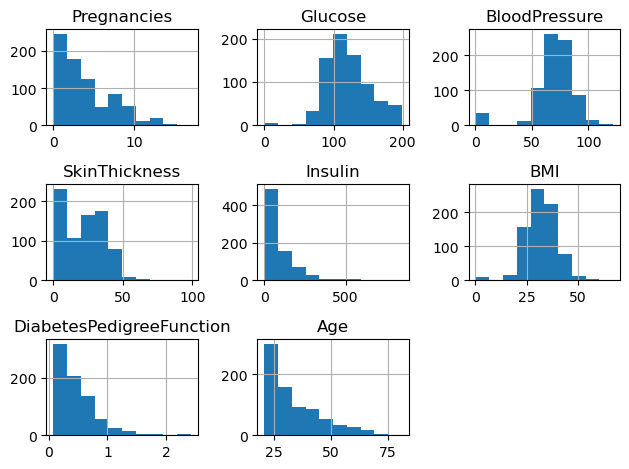

In [27]:
df.hist()
plt.tight_layout()
plt.show()

In [28]:
# create  individual boxplots and histplots
def histplot_boxplot(data, feature, figsize=(12,7), bins = None):
    
    fig, (ax_box , ax_hist) = plt.subplots(
    nrows=2,
    sharex = True,
    gridspec_kw={'height_ratios':(0.25,0.75)},
    figsize=figsize)
    
    sns.boxplot(data=data, x = feature , color='violet',ax = ax_box, showmeans=True)
    sns.histplot(data= data , x =feature, ax = ax_hist, bins = bins) if bins else
    plt.axvline(data[feature].mean(),
    plt.axvline(data[feature].median(), color = 'black'

SyntaxError: invalid syntax (3979697497.py, line 11)

In [29]:
num_outlier = {}
for col in df.columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 -q1
    outliers=((df[col] < (q1-1.5*iqr)) | (df[col] > (q3-1.5*iqr)))
    num_outlier=outliers.sum()
num_outlier

TypeError: unsupported operand type(s) for -: 'str' and 'str'